In [33]:
%matplotlib inline

In [34]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [35]:
import matplotlib
matplotlib.rcParams['xtick.labelsize'] = 20
matplotlib.rcParams['ytick.labelsize'] = 20
matplotlib.rcParams['axes.labelsize'] = 20
matplotlib.rcParams['axes.titlesize'] = 20

matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['grid.color'] = '0.8'
matplotlib.rcParams['grid.linewidth'] = '0.5'

matplotlib.rcParams['axes.edgecolor'] = '0.25'
matplotlib.rcParams['xtick.color'] = '0'
matplotlib.rcParams['ytick.color'] = '0'

matplotlib.rcParams['xtick.major.width'] = 2
matplotlib.rcParams['ytick.major.width'] = 2
matplotlib.rcParams['ytick.major.size'] = 10
matplotlib.rcParams['xtick.major.size'] = 10
# matplotlib.rcParams['axes.spines.right'] = False
# matplotlib.rcParams['axes.spines.left'] = False
# matplotlib.rcParams['axes.spines.top'] = False
# matplotlib.rcParams['axes.spines.bottom'] = False

matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.weight']='ultralight'
# matplotlib.rcParams['font.sans-serif'] = ['Computer Modern Sans Serif']
matplotlib.rcParams['axes.axisbelow'] = True

# Analysis here

In [65]:
file_name_modifiers = 'hyphy_threshold=-4.5_Conserved=False_ThreePrime=True'

df_raw = pd.read_csv('../Results/temp_df_{}.csv'.format(file_name_modifiers))
df_ratios = pd.read_csv('../Results/temp_df_{}_ratios.csv'.format(file_name_modifiers))

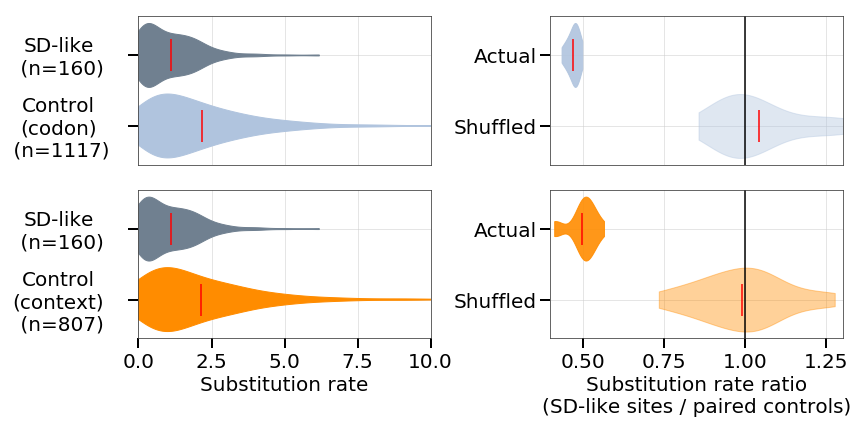

In [66]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(221)
columns = ['Control\n(codon)', 'SD-like']
plot_data = [df_raw[df_raw[i].isnull()==False][i] for i in columns]
violin_parts = ax1.violinplot(plot_data, points=1000, showextrema=False, showmeans=True, widths=0.9, vert=False);
ax1.set_yticks(list(range(1,len(columns)+1)))
column_plus_n = [i+'\n (n={})'.format(len(df_raw[df_raw[i].isnull()==False])) for i in columns]
ax1.set_yticklabels(column_plus_n, ha='center')
for i, pc in enumerate(violin_parts['bodies']):
    if i == 1:
        pc.set_facecolor('slategray')
        pc.set_edgecolor('slategray')
        pc.set_alpha(1)
    if i == 0:
        pc.set_facecolor('lightsteelblue')
        pc.set_edgecolor('lightsteelblue')
        pc.set_alpha(1) 
violin_parts['cmeans'].set_edgecolor('r')
ax1.tick_params(axis='y', which='major', pad=70)

ax3 = fig.add_subplot(223, sharex=ax1)
columns = ['Control\n(context)', 'SD-like']
plot_data = [df_raw[df_raw[i].isnull()==False][i] for i in columns]
violin_parts = ax3.violinplot(plot_data, points=1000, showextrema=False, showmeans=True, widths=0.9, vert=False);
ax3.set_yticks(list(range(1,len(columns)+1)))
column_plus_n = [i+'\n (n={})'.format(len(df_raw[df_raw[i].isnull()==False])) for i in columns]
ax3.set_yticklabels(column_plus_n, ha='center')
ax3.set_xlabel('Substitution rate')
for i, pc in enumerate(violin_parts['bodies']):
    if i == 1:
        pc.set_facecolor('slategray')
        pc.set_edgecolor('slategray')
        pc.set_alpha(1)
    if i == 0:
        pc.set_facecolor('darkorange')
        pc.set_edgecolor('darkorange')
        pc.set_alpha(1) 
violin_parts['cmeans'].set_edgecolor('r')

ax3.tick_params(axis='y', which='major', pad=70)
ax3.set_xlim(0, 10)

ax2 = fig.add_subplot(222)
violin_parts = ax2.violinplot([df_ratios['Shuffled_rats_codon'], df_ratios['Actual_rats_codon'],],\
                              widths=0.9, showextrema=False, showmeans=True, vert=False)
for i, pc in enumerate(violin_parts['bodies']):
    if i==0:
        pc.set_facecolor('lightsteelblue')
        pc.set_edgecolor('lightsteelblue')
        pc.set_alpha(0.4)   
    if i==1:
        pc.set_facecolor('lightsteelblue')
        pc.set_edgecolor('lightsteelblue')
        pc.set_alpha(0.9)
violin_parts['cmeans'].set_edgecolor('r')
ax2.axvline(1, c='k')
ax2.set_yticks(list(range(1,len(columns)+1)))
ax2.set_yticklabels(['Shuffled', 'Actual', ], ha='right')

ax4 = fig.add_subplot(224, sharex=ax2)
violin_parts = ax4.violinplot([df_ratios['Shuffled_rats_trint'], df_ratios['Actual_rats_trint']],\
                              widths=0.9, showextrema=False, showmeans=True, vert=False)
for i, pc in enumerate(violin_parts['bodies']):
    if i==0:
        pc.set_facecolor('darkorange')
        pc.set_edgecolor('darkorange')
        pc.set_alpha(0.4)   
    if i==1:
        pc.set_facecolor('darkorange')
        pc.set_edgecolor('darkorange')
        pc.set_alpha(0.9)
violin_parts['cmeans'].set_edgecolor('r')
ax4.axvline(1, c='k')
ax4.set_yticks(list(range(1,len(columns)+1)))
ax4.set_yticklabels(['Shuffled', 'Actual', ], ha='right')
ax4.set_xlim(0.4, 1.3)


ax4.set_xlabel('Substitution rate ratio\n(SD-like sites / paired controls)')
plt.setp(ax2.get_xticklabels(), visible=False);
plt.setp(ax1.get_xticklabels(), visible=False);


for line in ax2.xaxis.get_ticklines():
    line.set_markersize(0)
    line.set_markeredgewidth(0)
for line in ax1.xaxis.get_ticklines():
    line.set_markersize(0)
    line.set_markeredgewidth(0)
plt.tight_layout()

plt.savefig('../Results/fig_{}.pdf'.format(file_name_modifiers))